# Network accessibility

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')
accessibility_matrix = pd.read_pickle('./../../data/saint_petersburg/accessibility_matrix_intermodal.pickle')

## Utils

In [2]:
import geopandas as gpd

def plot_accessibility(accessibility_df : pd.DataFrame, method):
    gdf = blocks_gdf[['geometry']].join(accessibility_df)
    column = [c for c in gdf.columns if 'accessibility' in c][0]
    ax = gdf.plot(column=column, legend=True)
    ax.set_axis_off()
    ax.set_title(method.__name__)

## Median accessibility

Certified classic

In [3]:
from blocksnet.analysis.network import median_accessibility

med_acc_df = median_accessibility(accessibility_matrix)
med_acc_df.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,median_accessibility
0,88.0625
1,88.1875
2,121.0625
3,123.8125
4,109.5625


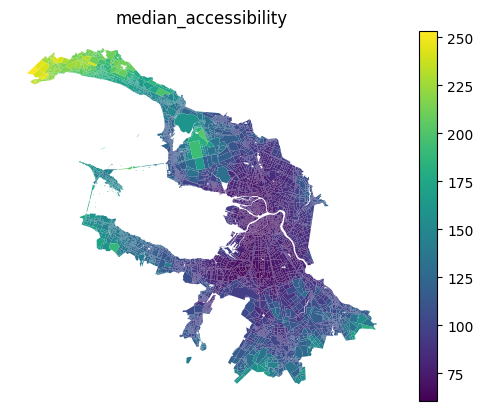

In [4]:
plot_accessibility(med_acc_df, median_accessibility)

## Max accessibility

In [5]:
from blocksnet.analysis.network import max_accessibility

max_acc_df = max_accessibility(accessibility_matrix)
max_acc_df.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,max_accessibility
0,290.00
1,285.50
2,328.50
3,331.25
4,319.75


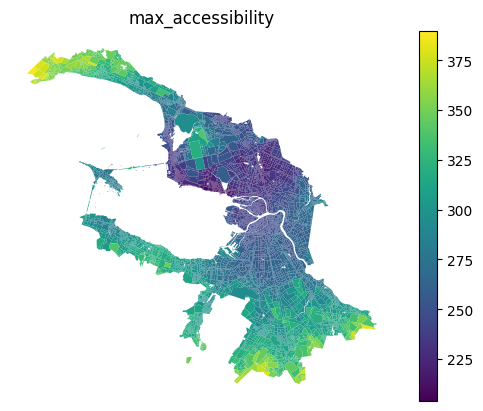

In [6]:
plot_accessibility(max_acc_df, max_accessibility)

## Area weighted accessibility

In [7]:
from blocksnet.analysis.network import area_accessibility

area_acc_df = area_accessibility(accessibility_matrix, blocks_gdf)
area_acc_df.head()

,area_accessibility
0,114.182650
1,113.829120
2,145.883085
3,148.541899
4,132.693568


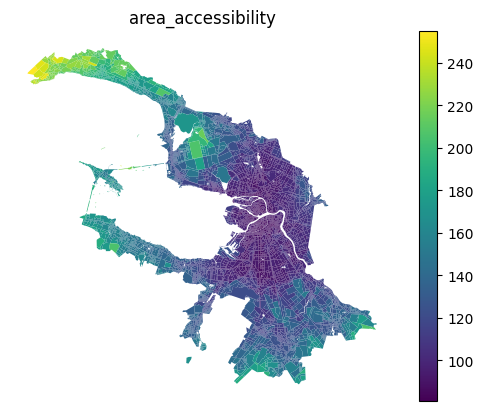

In [8]:
plot_accessibility(area_acc_df, area_accessibility)

## Mean accessibility

In [9]:
from blocksnet.analysis.network import mean_accessibility

mean_acc_df = mean_accessibility(accessibility_matrix)
mean_acc_df.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,mean_accessibility
0,102.875
1,101.875
2,135.875
3,138.500
4,124.000


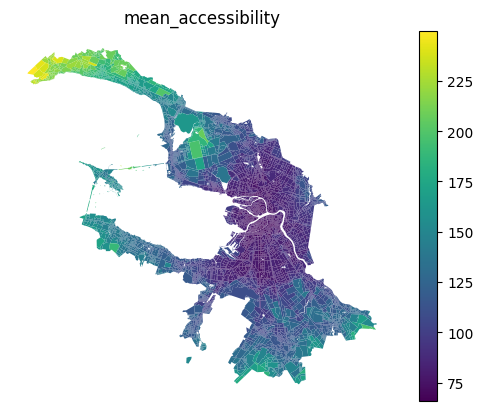

In [10]:
plot_accessibility(mean_acc_df, mean_accessibility)

## Relative accessibility

In [11]:
from blocksnet.analysis.network import relative_accessibility

block_id = 123
rel_acc_df = relative_accessibility(accessibility_matrix, block_id)
rel_acc_df.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,relative_accessibility
0,58.031250
1,79.937500
2,63.593750
3,66.312500
4,24.109375


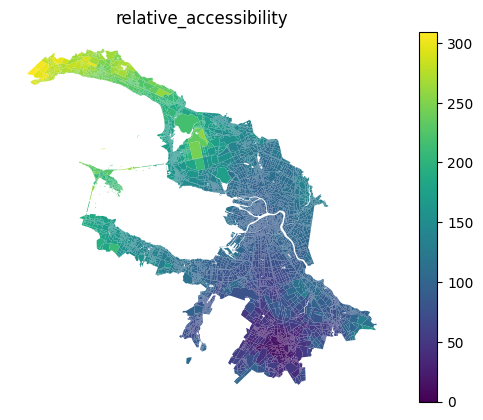

In [12]:
plot_accessibility(rel_acc_df, relative_accessibility)

## Land use accessibility

In [ ]:
from blocksnet.enums import LandUse
from blocksnet.analysis.network import land_use_accessibility

lu_acc_df = land_use_accessibility(accessibility_matrix, blocks_gdf, LandUse.BUSINESS, out=True)
lu_acc_df.head()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,land_use_accessibility
0,73.9375
1,70.9375
2,111.5625
3,114.2500
4,103.0625


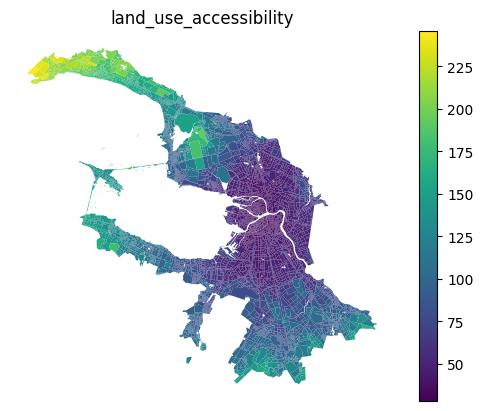

In [14]:
plot_accessibility(lu_acc_df, land_use_accessibility)

## Land use accessibility matrix

In [16]:
from blocksnet.analysis.network import land_use_accessibility_matrix

lu_acc_mx = land_use_accessibility_matrix(accessibility_matrix, blocks_gdf)
lu_acc_mx

,LandUse.RESIDENTIAL,LandUse.BUSINESS,LandUse.RECREATION,LandUse.INDUSTRIAL,LandUse.TRANSPORT,LandUse.SPECIAL,LandUse.AGRICULTURE
LandUse.RESIDENTIAL,93.5625,85.0000,114.750,93.9375,87.5625,115.5000,120.2500
LandUse.BUSINESS,84.8750,65.8125,107.000,82.2500,71.1875,106.0625,113.8750
LandUse.RECREATION,114.6250,106.8125,129.125,119.1250,111.1250,136.0000,149.3750
LandUse.INDUSTRIAL,94.0000,82.3125,119.250,90.0000,83.8750,115.7500,115.7500
LandUse.TRANSPORT,87.5625,70.9375,111.250,83.8750,74.7500,110.5000,114.5625
LandUse.SPECIAL,115.4375,106.7500,135.125,116.0625,110.8750,128.1250,140.6250
LandUse.AGRICULTURE,119.6250,113.1250,149.125,115.0000,113.5000,140.3750,112.7500
